## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## LOAD DATA

In [2]:
data = '/content/drive/MyDrive/Sales.csv'
df = pd.read_csv(data)
df.head(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991


## DATA PREPROCESSING

### ORDENAR POR FECHA

In [3]:
df.sort_values(["Date"], ascending=True)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
60993,2011-01-01,1,January,2011,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",1,344,540,185,344,529
58729,2011-01-01,1,January,2011,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,1097,4342,5439
58913,2011-01-01,1,January,2011,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",1,1519,2443,900,1519,2419
63711,2011-01-01,1,January,2011,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",3,713,1120,482,2139,2621
49787,2011-01-01,1,January,2011,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,561,1252,1813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22465,2016-07-31,31,July,2016,39,Adults (35-64),F,United States,California,Accessories,Cleaners,Bike Wash - Dissolver,5,3,8,24,15,39
23363,2016-07-31,31,July,2016,39,Adults (35-64),F,United States,California,Accessories,Fenders,Fender Set - Mountain,19,8,22,258,152,410
19225,2016-07-31,31,July,2016,48,Adults (35-64),F,United Kingdom,England,Clothing,Caps,AWC Logo Cap,16,7,9,26,112,138
94147,2016-07-31,31,July,2016,51,Adults (35-64),M,Germany,Saarland,Accessories,Tires and Tubes,ML Mountain Tire,6,11,30,82,66,148


In [4]:
# Como DATE es un tipo objeto, lo convierto a tipo datetime de la siguiente manera:
df["Date"]= df[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
df["Date"]=pd.to_datetime(df['Date'])
df["Date"].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Date, dtype: datetime64[ns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [6]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


### COMPRUEBO PRESENCIA DE VALORES NULOS EN EL DATASET

In [7]:
df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [8]:
#correlacion entre los features 
corr =df.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


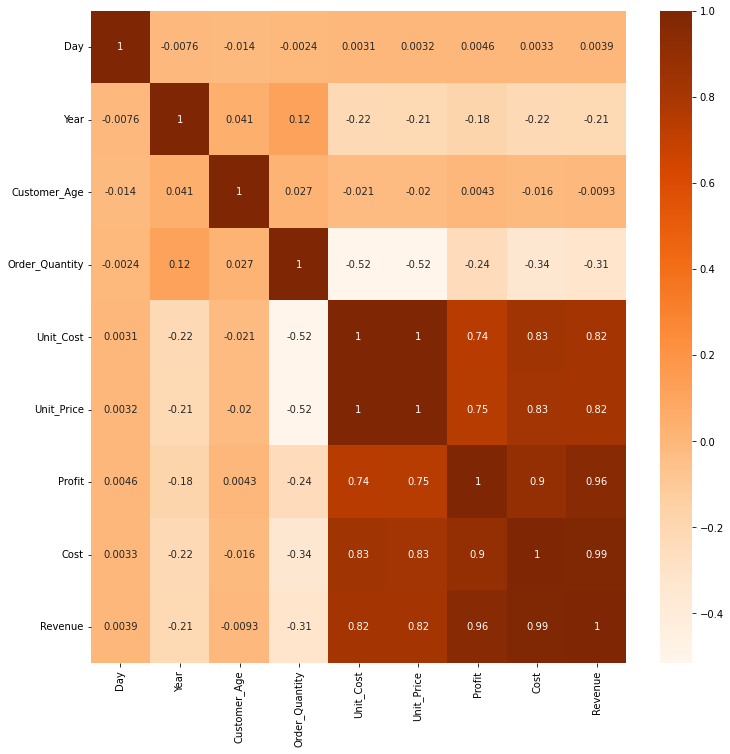

In [9]:
cp = sns.heatmap(corr,cmap='Oranges', annot=True)
plt.gcf().set_size_inches(12,12)

In [10]:
#verificamos si hay valores duplicados
df.duplicated().values.any()

True

In [11]:
df.duplicated().sum()

1000

In [12]:
#removemos esos valores duplicados
df = df.drop_duplicates()
df.shape

(112036, 18)

In [13]:
df.duplicated().values.any()

False

## ANÁLISIS RELACIONADOS CON FECHAS

### CUÁLES SON LOS AÑOS CON MÁS VENTAS?

In [14]:
df["Year"].value_counts()

2016    29128
2014    29122
2015    24227
2013    24224
2011     2671
2012     2664
Name: Year, dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs)>

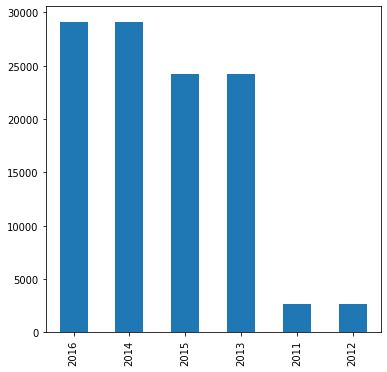

In [15]:
df["Year"].value_counts().plot(kind = "bar", figsize = (6, 6))
plt.legend

### CUÁLES SON LOS MESES CON MÁS VENTAS?

In [16]:
df["Month"].value_counts()

June         11127
December     11109
May          11019
April        10090
March         9591
January       9192
February      8956
October       8678
November      8646
August        8128
September     8100
July          7400
Name: Month, dtype: int64

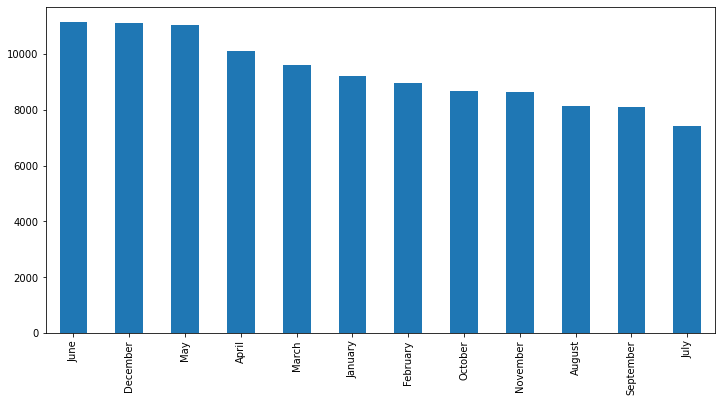

In [17]:
df["Month"].value_counts().plot(kind = "bar", figsize = (12, 6))

## ANÁLISIS RELACIONADOS CON EDAD Y GÉNERO

### CUÁL ES LA EDAD PROMEDIO DE LOS CLIENTES?

In [18]:
df_age = df['Customer_Age'].value_counts()
df_age

31    4343
34    4252
29    4181
32    4058
28    3938
      ... 
86       8
80       6
76       6
87       6
82       4
Name: Customer_Age, Length: 70, dtype: int64

In [19]:
round(df["Customer_Age"].mean())

36

### CUÁNTOS CLIENTES SON HOMBRES Y CUÁNTOS MUJERES

In [20]:
gender_male = df["Customer_Gender"] == "M"
gender_male = gender_male.sum()
gender_male

57813

In [21]:
gender_female = df["Customer_Gender"] == "F"
gender_female = gender_female.sum()
gender_female

54223

In [22]:
gender_total = gender_male + gender_female
gender_total

112036

In [23]:
prop_male = gender_male / gender_total
prop_male.round(3)*100

51.6

In [24]:
prop_female = gender_female / gender_total
prop_female.round(3)*100

48.4

<function matplotlib.pyplot.legend(*args, **kwargs)>

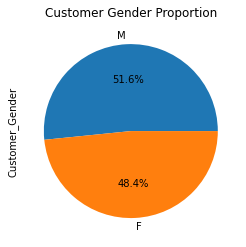

In [25]:
from numpy.core.fromnumeric import size
df["Customer_Gender"].value_counts().plot(kind= "pie", autopct='%1.1f%%')
plt.title("Customer Gender Proportion")
plt.legend

### EDAD PROMEDIO DE MUJERES Y HOMBRES

In [26]:
df.groupby("Customer_Gender").Customer_Age.mean().round()

Customer_Gender
F    36.0
M    36.0
Name: Customer_Age, dtype: float64

### CUÁL ES LA EDAD MÁS ALTA EN MUJERES Y HOMBRES

In [27]:
df.groupby("Customer_Gender").Customer_Age.max()

Customer_Gender
F    87
M    86
Name: Customer_Age, dtype: int64

### CUÁL ES LA EDAD MÁS BAJA EN MUJERES Y HOMBRES

In [28]:
df.groupby("Customer_Gender").Customer_Age.min()

Customer_Gender
F    17
M    17
Name: Customer_Age, dtype: int64

### CUÁNTAS VENTAS SE CORRESPONDEN POR CADA GRUPO ETARIO?

In [29]:
df["Age_Group"].value_counts()

Adults (35-64)          55358
Young Adults (25-34)    38299
Youth (<25)             17660
Seniors (64+)             719
Name: Age_Group, dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs)>

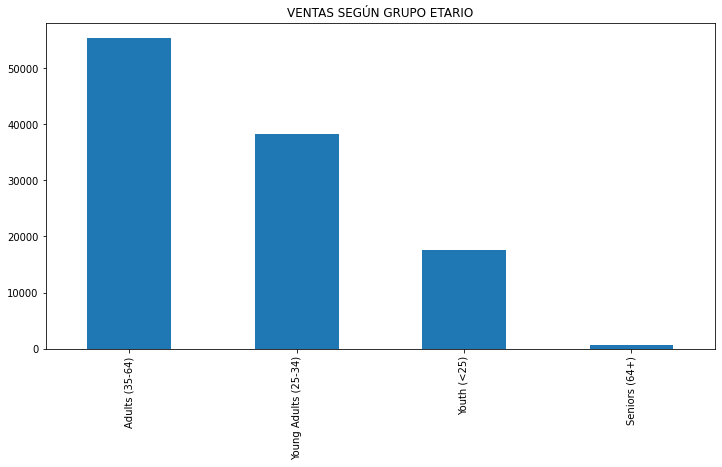

In [30]:
df["Age_Group"].value_counts().plot(kind = "bar", figsize=(12,6))
plt.title("VENTAS SEGÚN GRUPO ETARIO")
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

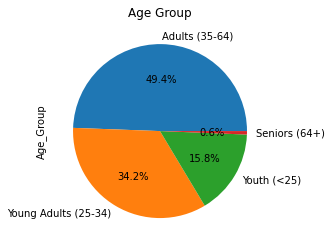

In [31]:
df["Age_Group"].value_counts().plot(kind = "pie", autopct = '%1.1f%%')
plt.title("Age Group")
plt.legend

### CUÁLES SON INGRESOS POR GRUPO ETARIO?

In [32]:
df.groupby("Age_Group").Revenue.mean().round(4)

Age_Group
Adults (35-64)          765.3308
Seniors (64+)           427.0793
Young Adults (25-34)    795.5046
Youth (<25)             661.6925
Name: Revenue, dtype: float64

### GRÁFICO DE DISPERSIÓN: RELACIÓN ENTRE EDAD E INGRESO

<function matplotlib.pyplot.legend(*args, **kwargs)>

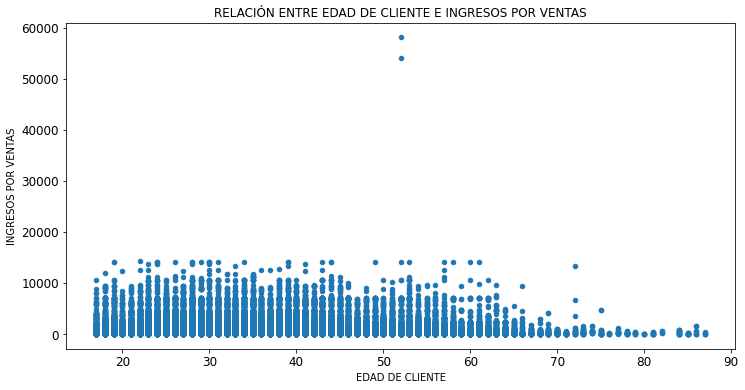

In [33]:
df.plot(kind="scatter", x = "Customer_Age", y = "Revenue", figsize=(12,6), fontsize=12)
plt.xlabel("EDAD DE CLIENTE")
plt.ylabel("INGRESOS POR VENTAS")
plt.title("RELACIÓN ENTRE EDAD DE CLIENTE E INGRESOS POR VENTAS")
plt.legend

## ANÁLISIS RELACIONADOS CON DESTINOS DE VENTAS

### CUÁLES SON LOS DESTINOS DE LAS VENTAS?

In [34]:
df["Country"].value_counts()

United States     38840
Australia         23736
Canada            14027
United Kingdom    13486
Germany           11027
France            10920
Name: Country, dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs)>

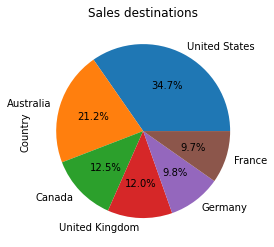

In [35]:
df["Country"].value_counts().plot(kind= "pie", autopct = '%1.1f%%')
plt.title("Sales destinations")
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

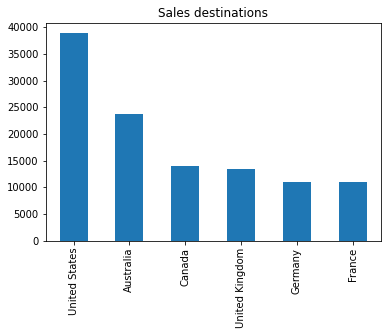

In [36]:
df["Country"].value_counts().plot(kind= "bar")
plt.title("Sales destinations")
plt.legend

## ANÁLISIS RELACIONADOS CON REVENUE

### CUÁL ES EL INGRESO PROMEDIO POR GRUPO ETARIO?

In [37]:
df.groupby("Age_Group").Revenue.mean()

Age_Group
Adults (35-64)          765.330774
Seniors (64+)           427.079277
Young Adults (25-34)    795.504635
Youth (<25)             661.692469
Name: Revenue, dtype: float64

### CUÁL ES EL INGRESO PROMEDIO POR PAÍS?

In [38]:
df.groupby("Country").Revenue.mean()

Country
Australia         893.006193
Canada            563.640265
France            770.581044
Germany           812.253922
United Kingdom    784.193089
United States     715.167302
Name: Revenue, dtype: float64

In [39]:
df.groupby("Country").Profit.mean()

Country
Australia         283.978851
Canada            263.920938
France            263.011172
Germany           303.798948
United Kingdom    325.076895
United States     283.152369
Name: Profit, dtype: float64

### CUÁLES SON LAS CATEGORÍAS MÁS VENDIDAS?

In [40]:
df["Product_Category"].value_counts()

Accessories    69312
Bikes          25794
Clothing       16930
Name: Product_Category, dtype: int64

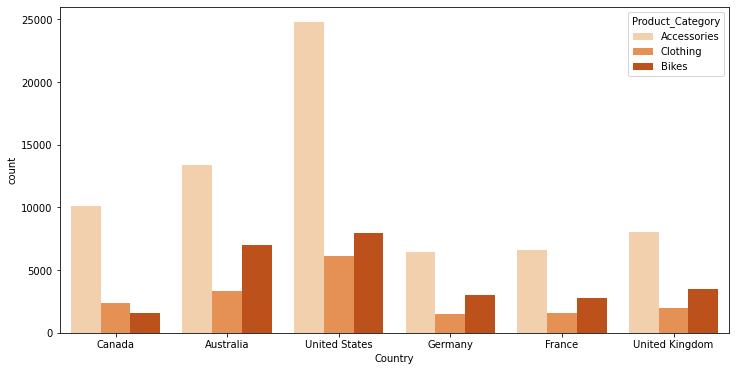

In [42]:
# las categorias mas vendidas por paises
df.groupby(['Country', 'Product_Category'])['Revenue'].sum()
sns.countplot(data = df, x='Country', hue='Product_Category', palette=('Oranges'))
#plt.savefig('product11.jpg')
plt.gcf().set_size_inches(12,6)

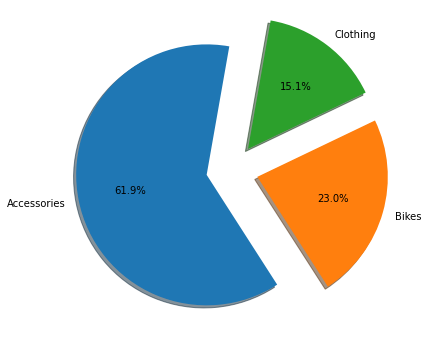

In [43]:
df_product = df['Product_Category'].value_counts()
label= [df_product.index.tolist()]
plt.pie(df_product, shadow=True,labels=label[0],explode=(0.2, 0.2, 0.2), autopct='%1.1f%%', startangle=80)
plt.gcf().set_size_inches(12,6)
#plt.savefig('product.jpg')
plt.show()

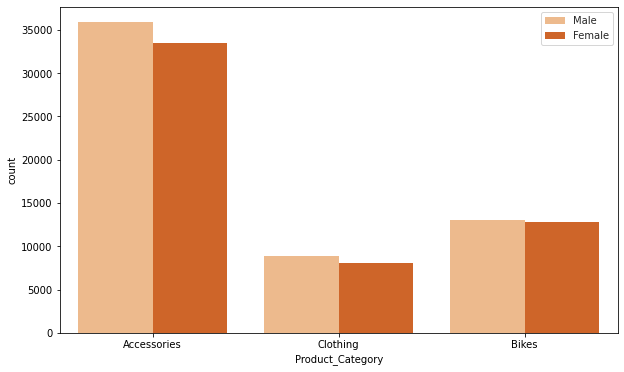

In [45]:
#ventas de categoria de productos en base al genero
sns.countplot(data = df, x='Product_Category', hue='Customer_Gender', palette=('Oranges'))
plt.xticks(rotation=0)
sns.set_style("whitegrid")
plt.legend(['Male', 'Female'])
plt.gcf().set_size_inches(10,6)
#plt.savefig('customer.jpg')
plt.show()

### CUÁLES SON LAS SUBCATEGORÍAS MÁS VENDIDAS?

In [44]:
df["Sub_Category"].value_counts()

Tires and Tubes      33298
Bottles and Cages    15649
Road Bikes           13313
Helmets              12150
Mountain Bikes        8803
Jerseys               6006
Caps                  4358
Fenders               4032
Touring Bikes         3678
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            455
Name: Sub_Category, dtype: int64

### CUÁLES SON LOS PRODUCTOS MÁS VENDIDOS?

In [46]:
df["Product"].value_counts()

Water Bottle - 30 oz.      10641
Patch Kit/8 Patches        10256
Mountain Tire Tube          6688
AWC Logo Cap                4358
Sport-100 Helmet, Red       4218
                           ...  
Mountain-100 Silver, 48       58
Mountain-100 Silver, 42       54
Mountain-500 Silver, 48       40
Road-650 Red, 52              32
Mountain-500 Black, 52        22
Name: Product, Length: 130, dtype: int64

### CUÁL ES EL PRODUCTO QUE MÁS GANANCIA GENERA?

In [48]:
mas_ganancia = df.groupby("Product").Profit.sum().head(10).sort_values(ascending=False)
mas_ganancia

Product
Fender Set - Mountain     749041
HL Mountain Tire          522853
HL Road Tire              264971
All-Purpose Bike Stand    200350
Classic Vest, S           170581
Half-Finger Gloves, L     166721
Classic Vest, M           161740
Classic Vest, L           157319
Bike Wash - Dissolver     116008
AWC Logo Cap               78008
Name: Profit, dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs)>

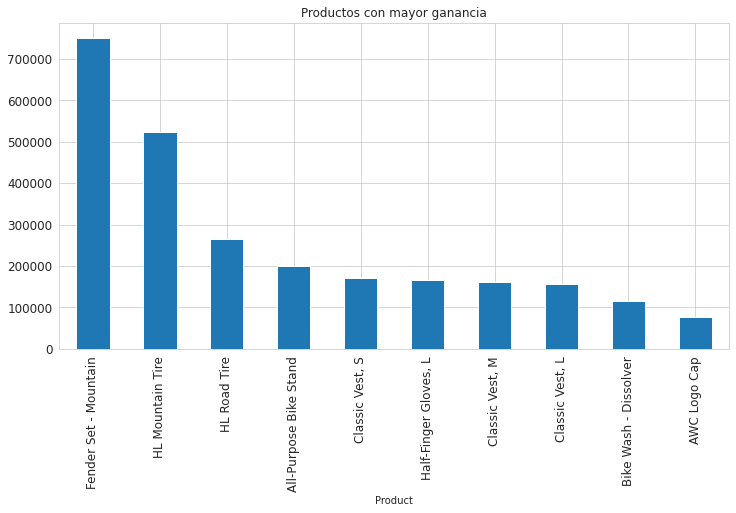

In [49]:
mas_ganancia.plot(kind="bar", figsize=(12,6), fontsize=12)
plt.title("Productos con mayor ganancia")
plt.legend

## COSTO UNITARIO Y PRECIO UNITARIO

In [50]:
df["Unit_Cost"].describe()

count    112036.000000
mean        267.819603
std         550.218722
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [51]:
df["Unit_Cost"].mean().round(2)

267.82

Text(0.5, 1.0, 'Relación entre Costo Unitario y Precio Unitario')

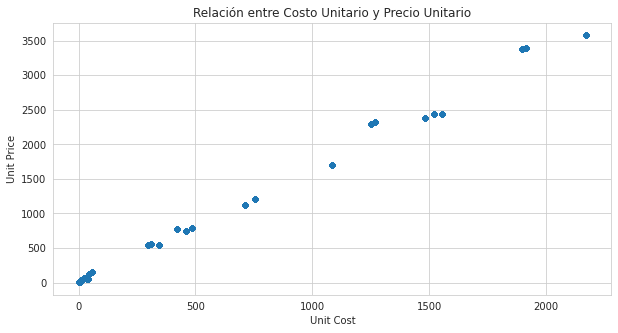

In [52]:
df.plot(kind="scatter", x = "Unit_Cost", y = "Unit_Price", figsize = (10,5), fontsize=10)
plt.xlabel("Unit Cost")
plt.ylabel("Unit Price")
plt.title("Relación entre Costo Unitario y Precio Unitario")

### CANTIDAD POR PEDIDO Y GANANCIA (ORDER QUANTITY AND PROFIT)

In [53]:
df["Order_Quantity"].describe()

count    112036.000000
mean         11.904254
std           9.564877
min           1.000000
25%           2.000000
50%          10.000000
75%          20.000000
max          32.000000
Name: Order_Quantity, dtype: float64

<function matplotlib.pyplot.legend(*args, **kwargs)>

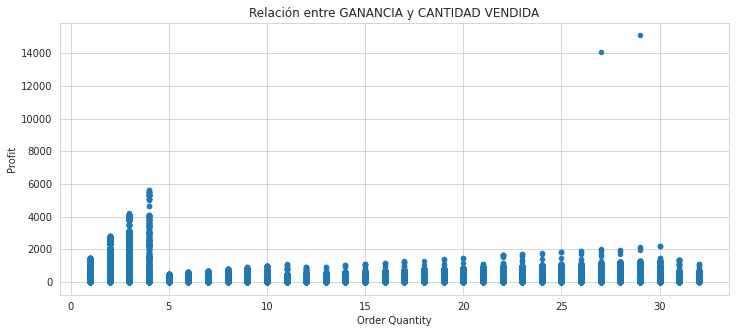

In [54]:
df.plot(kind="scatter", x="Order_Quantity", y="Profit", figsize=(12,5), fontsize=10)
plt.title("Relación entre GANANCIA y CANTIDAD VENDIDA")
plt.xlabel("Order Quantity")
plt.ylabel("Profit")
plt.legend

### EVOLUCIÓN DE LAS VENTAS

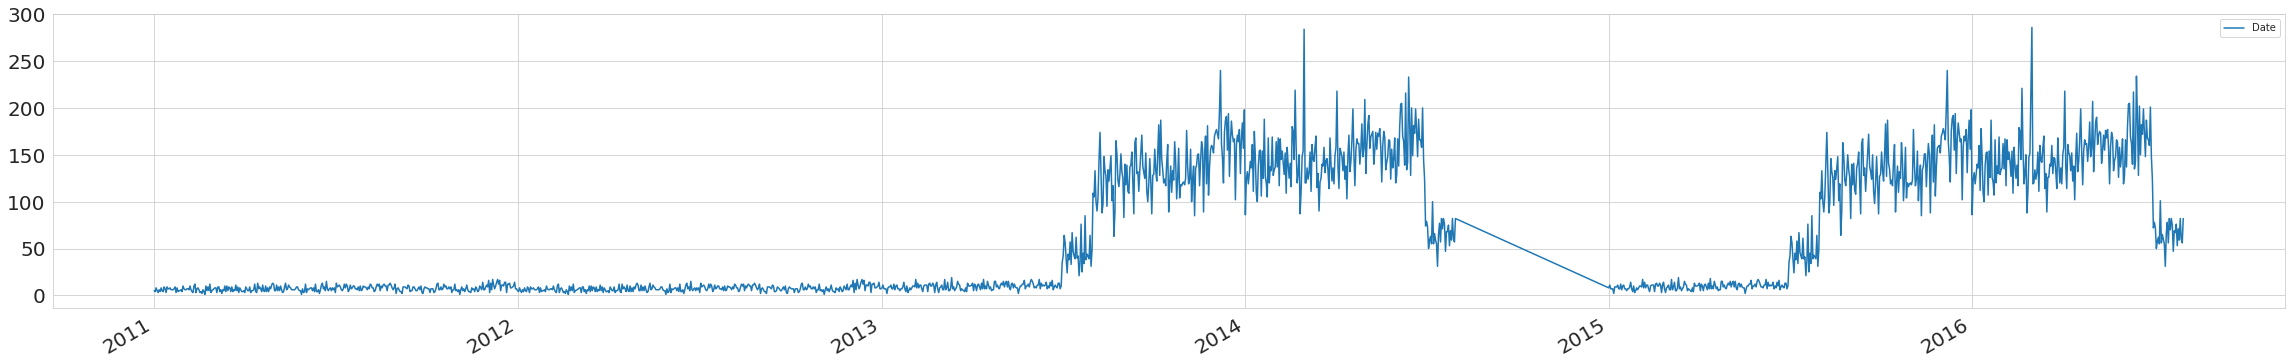

In [55]:
df["Date"].value_counts().plot(kind="line", figsize=(40,6), fontsize=20)
plt.legend()

### CUÁLES SON LOS PRODUCTOS MÁS VENDIDOS?

In [56]:
df.loc[:,"Product"].value_counts().head(10)

Water Bottle - 30 oz.      10641
Patch Kit/8 Patches        10256
Mountain Tire Tube          6688
AWC Logo Cap                4358
Sport-100 Helmet, Red       4218
Sport-100 Helmet, Black     4148
Road Tire Tube              4106
Fender Set - Mountain       4032
Sport-100 Helmet, Blue      3786
Touring Tire Tube           3634
Name: Product, dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs)>

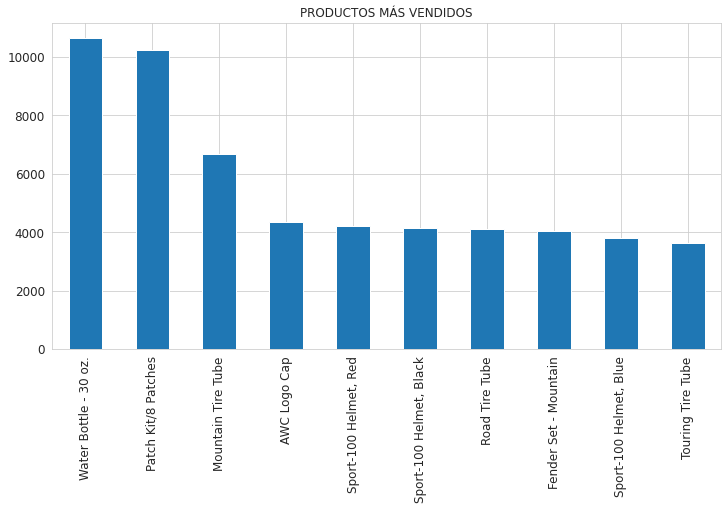

In [57]:
df.loc[:,"Product"].value_counts().head(10).plot(kind="bar", figsize=(12,6), fontsize=12)
plt.title("PRODUCTOS MÁS VENDIDOS")
plt.legend

### DISTRIBUCIÓN DE CANTIDAD VENDIDA

<function matplotlib.pyplot.legend(*args, **kwargs)>

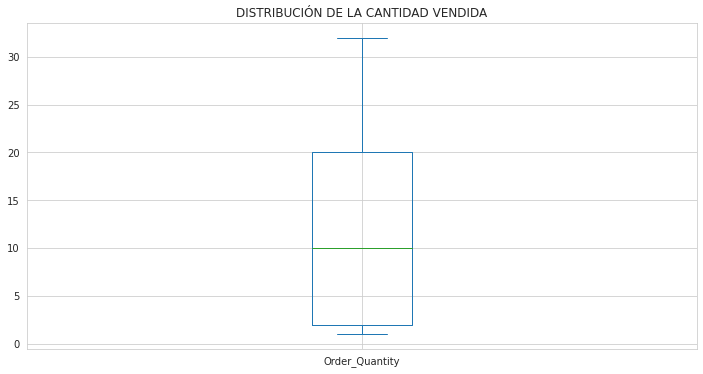

In [58]:
df["Order_Quantity"].plot(kind="box", figsize=(12,6))
plt.title("DISTRIBUCIÓN DE LA CANTIDAD VENDIDA")
plt.legend

## ANÁLISIS DE  COMPRAS DE PRODUCTO ÚNICO

In [59]:
one_order = df[df["Order_Quantity"]==1]
one_order = one_order.sort_values(["Date"], ascending=True)
one_order

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
49787,2011-01-01,1,January,2011,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,561,1252,1813
60993,2011-01-01,1,January,2011,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",1,344,540,185,344,529
58913,2011-01-01,1,January,2011,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",1,1519,2443,900,1519,2419
65741,2011-01-02,2,January,2011,35,Adults (35-64),F,United States,California,Bikes,Road Bikes,"Road-550-W Yellow, 48",1,713,1120,385,713,1098
69063,2011-01-02,2,January,2011,32,Young Adults (25-34),M,United Kingdom,England,Bikes,Road Bikes,"Road-550-W Yellow, 38",1,713,1120,362,713,1075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27719,2016-07-30,30,July,2016,40,Adults (35-64),M,United States,Washington,Clothing,Gloves,"Half-Finger Gloves, S",1,9,24,10,9,19
76826,2016-07-30,30,July,2016,33,Young Adults (25-34),M,Canada,British Columbia,Accessories,Tires and Tubes,Patch Kit/8 Patches,1,1,2,1,1,2
96983,2016-07-31,31,July,2016,21,Youth (<25),F,Australia,New South Wales,Accessories,Tires and Tubes,Mountain Tire Tube,1,2,5,2,2,4
87199,2016-07-31,31,July,2016,17,Youth (<25),M,Canada,British Columbia,Accessories,Tires and Tubes,Mountain Tire Tube,1,2,5,3,2,5


In [60]:
one_order["Profit"].describe()

count    22397.000000
mean       469.952226
std        374.802333
min         -1.000000
25%        161.000000
50%        385.000000
75%        768.000000
max       1454.000000
Name: Profit, dtype: float64

In [61]:
one_order["Revenue"].describe()

count    22397.000000
mean      1398.348261
std       1024.233435
min          2.000000
25%        529.000000
50%       1395.000000
75%       2227.000000
max       3542.000000
Name: Revenue, dtype: float64

### CUÁL ES LA CATEGORÍA DE PRODUCTO MÁS VENDIDO?

<function matplotlib.pyplot.legend(*args, **kwargs)>

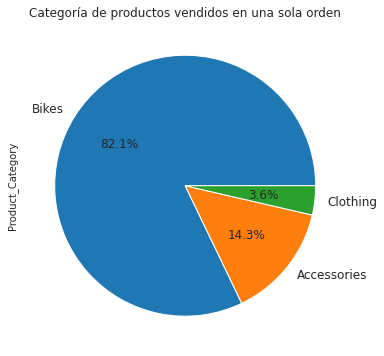

In [62]:
one_order["Product_Category"].value_counts().plot(kind="pie", figsize=(12,6), fontsize=12, autopct="%1.1f%%")
plt.title("Categoría de productos vendidos en una sola orden")
plt.legend

### CUÁL ES LA SUBCATEGORÍA DE PRODUCTO MÁS  VENDIDO?

<function matplotlib.pyplot.legend(*args, **kwargs)>

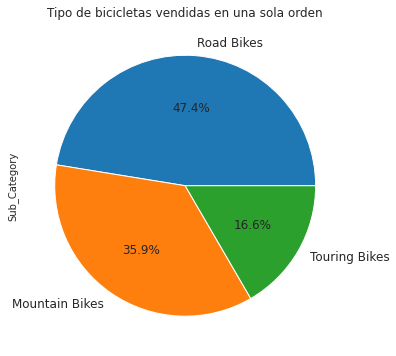

In [63]:
one_order.loc[one_order["Product_Category"]=="Bikes", "Sub_Category"].value_counts().plot(
    kind="pie", figsize=(12,6), fontsize=12, autopct="%1.1f%%")
plt.title("Tipo de bicicletas vendidas en una sola orden")
plt.legend

### CUÁLES SON LOS MODELOS DE ROAD BIKES MÁS VENDIDOS?

<function matplotlib.pyplot.legend(*args, **kwargs)>

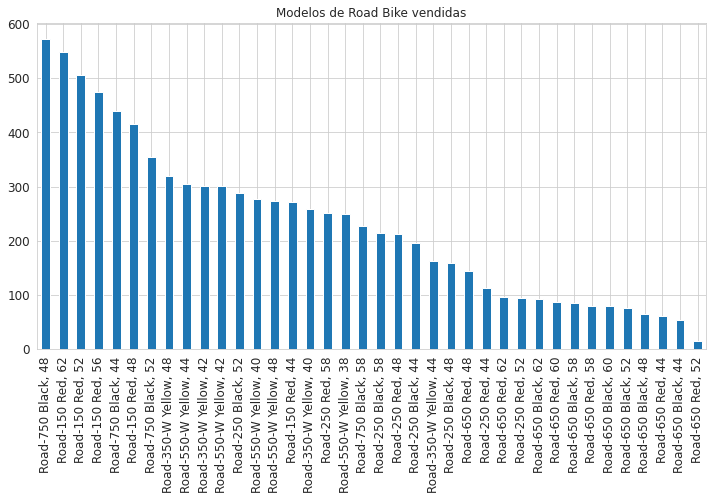

In [64]:
one_order.loc[one_order["Sub_Category"]=="Road Bikes", "Product"].value_counts().plot(
kind="bar", figsize=(12,6), fontsize=12)
plt.title("Modelos de Road Bike vendidas")
plt.legend

### CUÁLES SON LOS MODELOS DE MOUNTAIN BIKES MÁS VENDIDOS?

<function matplotlib.pyplot.legend(*args, **kwargs)>

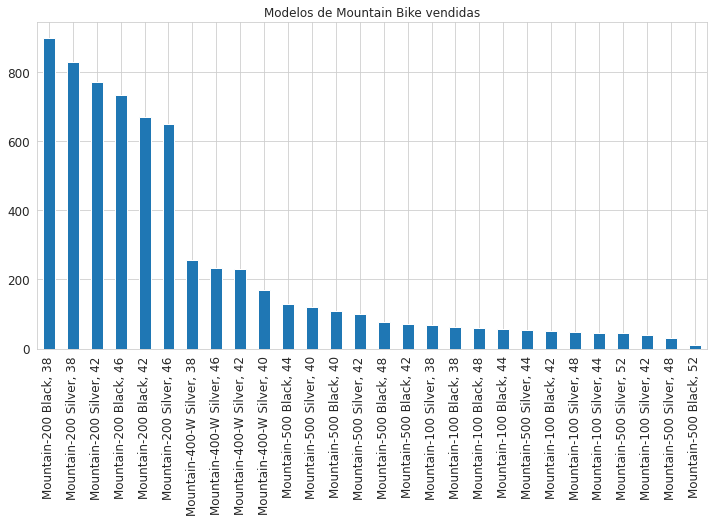

In [65]:
one_order.loc[one_order["Sub_Category"]=="Mountain Bikes", "Product"].value_counts().plot(
kind="bar", figsize=(12,6), fontsize=12)
plt.title("Modelos de Mountain Bike vendidas")
plt.legend

### CUÁLES SON LOS MODELOS DE TOURING BIKES MÁS VENDIDOS?

<function matplotlib.pyplot.legend(*args, **kwargs)>

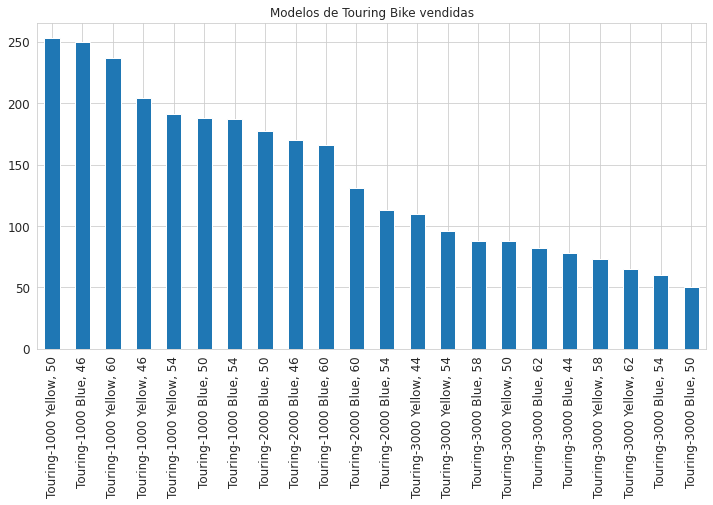

In [66]:
one_order.loc[one_order["Sub_Category"]=="Touring Bikes", "Product"].value_counts().plot(
kind="bar", figsize=(12,6), fontsize=12)
plt.title("Modelos de Touring Bike vendidas")
plt.legend

### GÉNERO DE CLIENTES QUE COMPRARON ROAD BIKE

<function matplotlib.pyplot.legend(*args, **kwargs)>

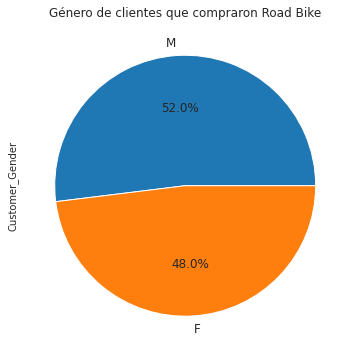

In [67]:
one_order.loc[one_order["Sub_Category"]=="Road Bikes", "Customer_Gender"].value_counts().plot(
    kind="pie", figsize=(12,6), fontsize=12, autopct="%1.1f%%")
plt.title("Género de clientes que compraron Road Bike")
plt.legend

### GRUPO ETARIO DE CLIENTES QUE COMPRARON ROAD BIKE

<function matplotlib.pyplot.legend(*args, **kwargs)>

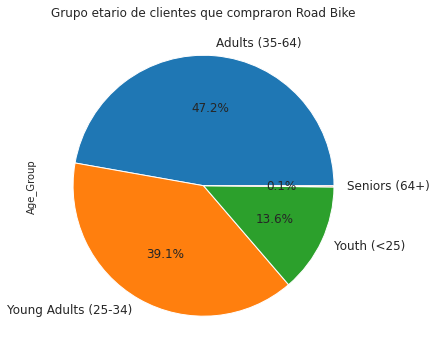

In [68]:
one_order.loc[one_order["Sub_Category"]=="Road Bikes", "Age_Group"].value_counts().plot(
    kind="pie", figsize=(12,6), fontsize=12, autopct="%1.1f%%")
plt.title("Grupo etario de clientes que compraron Road Bike")
plt.legend

### GÉNERO DE CLIENTES QUE COMPRARON MOUNTAIN BIKE

<function matplotlib.pyplot.legend(*args, **kwargs)>

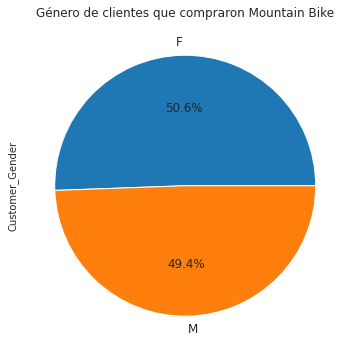

In [69]:
one_order.loc[one_order["Sub_Category"]=="Mountain Bikes", "Customer_Gender"].value_counts().plot(
    kind="pie", figsize=(12,6), fontsize=12, autopct="%1.1f%%")
plt.title("Género de clientes que compraron Mountain Bike")
plt.legend

### GRUPO ETARIO DE CLIENTES QUE COMPRARON MOUNTAIN BIKE

<function matplotlib.pyplot.legend(*args, **kwargs)>

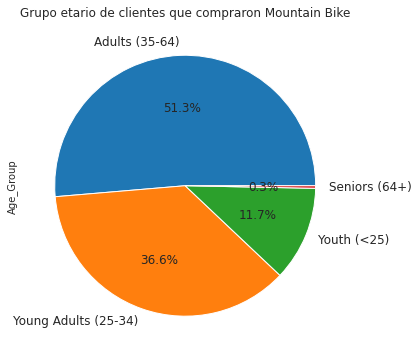

In [70]:
one_order.loc[one_order["Sub_Category"]=="Mountain Bikes", "Age_Group"].value_counts().plot(
    kind="pie", figsize=(12,6), fontsize=12, autopct="%1.1f%%")
plt.title("Grupo etario de clientes que compraron Mountain Bike")
plt.legend

### GÉNERO DE CLIENTES QUE COMPRARON TOURING BIKE

<function matplotlib.pyplot.legend(*args, **kwargs)>

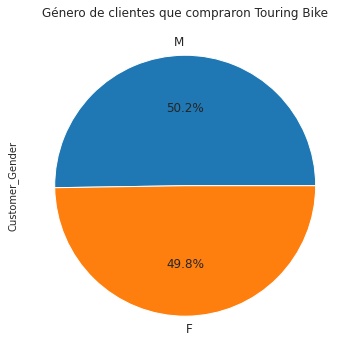

In [71]:
one_order.loc[one_order["Sub_Category"]=="Touring Bikes", "Customer_Gender"].value_counts().plot(
    kind="pie", figsize=(12,6), fontsize=12, autopct="%1.1f%%")
plt.title("Género de clientes que compraron Touring Bike")
plt.legend

### GRUPO ETARIO DE CLIENTES QUE COMPRARON TOURING BIKE

<function matplotlib.pyplot.legend(*args, **kwargs)>

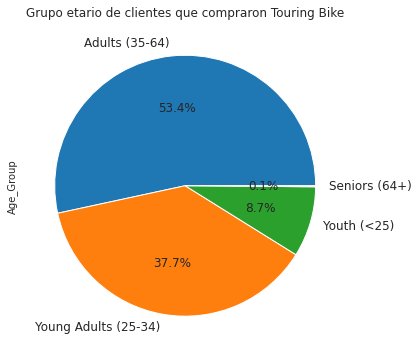

In [72]:
one_order.loc[one_order["Sub_Category"]=="Touring Bikes", "Age_Group"].value_counts().plot(
    kind="pie", figsize=(12,6), fontsize=12, autopct="%1.1f%%")
plt.title("Grupo etario de clientes que compraron Touring Bike")
plt.legend

In [73]:
one_order.groupby(["Age_Group", "Sub_Category", "Customer_Gender"]).count()

Date  Day  Month  Year  \
Age_Group      Sub_Category      Customer_Gender                           
Adults (35-64) Bike Racks        F                  15   15     15    15   
                                 M                  16   16     16    16   
               Bike Stands       F                  21   21     21    21   
                                 M                  13   13     13    13   
               Bottles and Cages F                 169  169    169   169   
...                                                ...  ...    ...   ...   
Youth (<25)    Tires and Tubes   M                 158  158    158   158   
               Touring Bikes     F                 115  115    115   115   
                                 M                 152  152    152   152   
               Vests             F                   5    5      5     5   
                                 M                   2    2      2     2   

                                                  Customer_Age  Country  \
Age_Group      Sub_Category      Customer_Gender                          
Adults (35-64) Bike Racks        F                          15       15   
                                 M                          16       16   
               Bike Stands       F                          21       21   
                                 M                          13       13   
               Bottles and Cages F                         169      169   
...                                                        ...      ...   
Youth (<25)    Tires and Tubes   M                         158      158   
               Touring Bikes     F                         115      115   
                                 M                         152      152   
               Vests             F                           5        5   
                                 M                           2        2   

                                                  State  Product_Category  \
Age_Group      Sub_Category      Customer_Gender                            
Adults (35-64) Bike Racks        F                   15                15   
                                 M                   16                16   
               Bike Stands       F                   21                21   
                                 M                   13                13   
               Bottles and Cages F                  169               169   
...                                                 ...               ...   
Youth (<25)    Tires and Tubes   M                  158               158   
               Touring Bikes     F                  115               115   
                                 M                  152               152   
               Vests             F                    5                 5   
                                 M                    2                 2   

                                                  Product  Order_Quantity  \
Age_Group      Sub_Category      Customer_Gender                            
Adults (35-64) Bike Racks        F                     15              15   
                                 M                     16              16   
               Bike Stands       F                     21              21   
                                 M                     13              13   
               Bottles and Cages F                    169             169   
...                                                   ...             ...   
Youth (<25)    Tires and Tubes   M                    158             158   
               Touring Bikes     F                    115             115   
                                 M                    152             152   
               Vests             F                      5               5   
                                 M                      2               2   

                                                  Unit_Cost  Unit_Price  \
Age_Gr

In [74]:
touring_bikes_women = one_order.loc[(one_order["Customer_Gender"]=="F") & 
              (one_order["Age_Group"]) & 
              (one_order["Sub_Category"]=="Touring Bikes")]
touring_bikes_women

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
111370,2013-07-01,1,July,2013,19,Youth (<25),F,Australia,New South Wales,Bikes,Touring Bikes,"Touring-1000 Blue, 54",1,1482,2384,592,1482,2074
111108,2013-07-01,1,July,2013,30,Young Adults (25-34),F,Germany,Nordrhein-Westfalen,Bikes,Touring Bikes,"Touring-1000 Yellow, 60",1,1482,2384,592,1482,2074
110454,2013-07-01,1,July,2013,36,Adults (35-64),F,United States,California,Bikes,Touring Bikes,"Touring-2000 Blue, 60",1,755,1215,436,755,1191
111140,2013-07-02,2,July,2013,18,Youth (<25),F,Germany,Hamburg,Bikes,Touring Bikes,"Touring-2000 Blue, 46",1,755,1215,375,755,1130
111878,2013-07-03,3,July,2013,28,Young Adults (25-34),F,Australia,Victoria,Bikes,Touring Bikes,"Touring-1000 Blue, 46",1,1482,2384,401,1482,1883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109201,2016-06-29,29,June,2016,51,Adults (35-64),F,Germany,Saarland,Bikes,Touring Bikes,"Touring-3000 Yellow, 54",1,461,742,147,461,608
108751,2016-06-29,29,June,2016,46,Adults (35-64),F,Australia,New South Wales,Bikes,Touring Bikes,"Touring-3000 Blue, 44",1,461,742,185,461,646
110005,2016-06-30,30,June,2016,25,Young Adults (25-34),F,Germany,Saarland,Bikes,Touring Bikes,"Touring-2000 Blue, 60",1,755,1215,241,755,996
110349,2016-06-30,30,June,2016,39,Adults (35-64),F,Canada,Alberta,Bikes,Touring Bikes,"Touring-1000 Blue, 46",1,1482,2384,902,1482,2384


<function matplotlib.pyplot.legend(*args, **kwargs)>

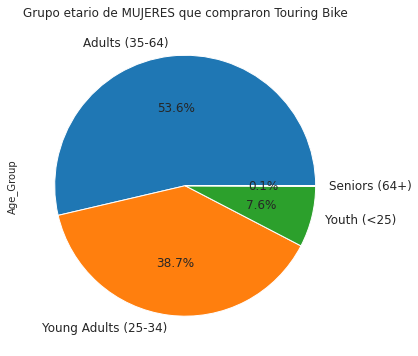

In [75]:
touring_bikes_women["Age_Group"].value_counts().plot(
    kind="pie", figsize=(12,6), fontsize=12, autopct="%1.1f%%")
plt.title("Grupo etario de MUJERES que compraron Touring Bike")
plt.legend

## ANÁLISIS DE VENTAS EN USA

In [80]:
usa_sales = df[df["Country"]=="United States"]
usa_sales = usa_sales.sort_values(["Date"], ascending=True)
usa_sales

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
60993,2011-01-01,1,January,2011,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",1,344,540,185,344,529
63711,2011-01-01,1,January,2011,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",3,713,1120,482,2139,2621
65741,2011-01-02,2,January,2011,35,Adults (35-64),F,United States,California,Bikes,Road Bikes,"Road-550-W Yellow, 48",1,713,1120,385,713,1098
70757,2011-01-03,3,January,2011,39,Adults (35-64),F,United States,California,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5342,8684,14026
57953,2011-01-03,3,January,2011,29,Young Adults (25-34),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1,1266,2320,1008,1266,2274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8467,2016-07-31,31,July,2016,36,Adults (35-64),M,United States,Virginia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,11,2,5,21,22,43
112281,2016-07-31,31,July,2016,38,Adults (35-64),F,United States,California,Clothing,Vests,"Classic Vest, S",17,24,64,658,408,1066
44415,2016-07-31,31,July,2016,55,Adults (35-64),F,United States,California,Clothing,Jerseys,"Long-Sleeve Logo Jersey, S",17,38,50,187,646,833
10669,2016-07-31,31,July,2016,39,Adults (35-64),M,United States,California,Accessories,Bottles and Cages,Mountain Bottle Cage,19,4,10,110,76,186


### CANTIDAD DE VENTAS POR ESTADO

In [81]:
usa_sales["State"].value_counts()

California        22220
Washington        11168
Oregon             5246
Texas                30
Illinois             28
Ohio                 28
New York             20
Florida              14
South Carolina       10
Utah                 10
Kentucky             10
Wyoming               8
Georgia               8
Minnesota             6
Montana               6
Missouri              6
Mississippi           4
North Carolina        4
Alabama               4
Arizona               4
Virginia              4
Massachusetts         2
Name: State, dtype: int64

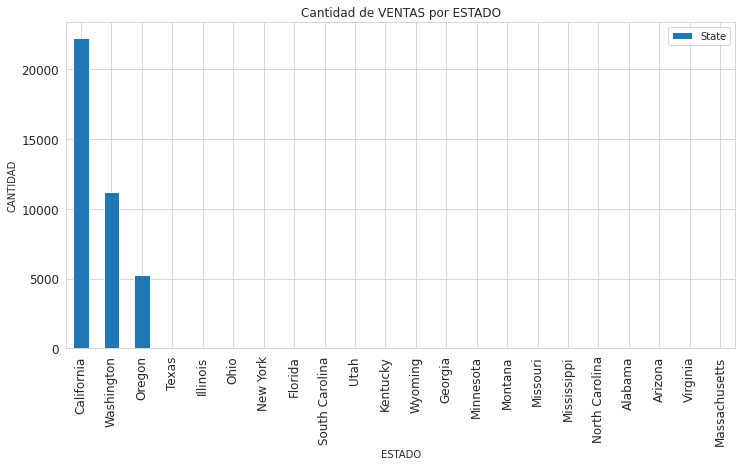

In [82]:
usa_sales["State"].value_counts().plot(kind="bar", figsize=(12,6), fontsize=12)
plt.title("Cantidad de VENTAS por ESTADO")
plt.xlabel("ESTADO")
plt.ylabel("CANTIDAD")
plt.legend()

### INGRESOS POR ESTADO

In [83]:
state_revenue = usa_sales.groupby(usa_sales["State"]).sum()["Revenue"]
state_revenue = state_revenue.sort_values(ascending = False)
state_revenue.head(5)

State
California    17529787
Washington     6701258
Oregon         3435046
Wyoming          21973
Illinois         20141
Name: Revenue, dtype: int64

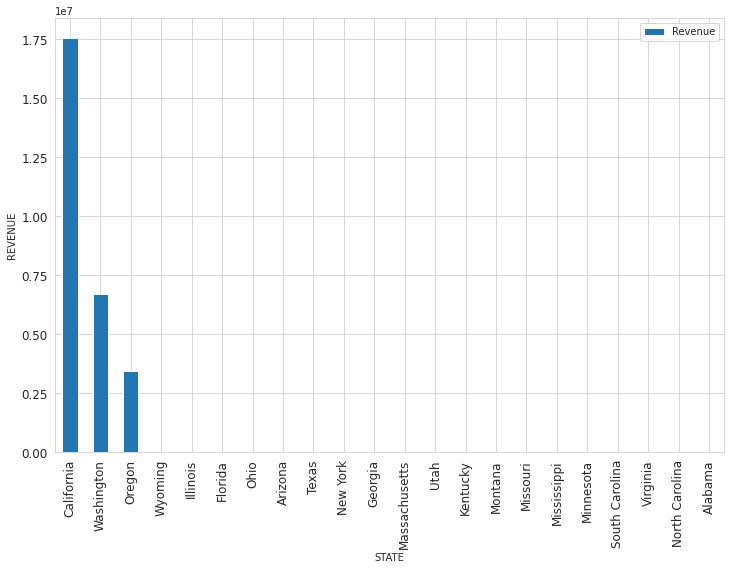

In [84]:
state_revenue.plot(kind="bar", figsize=(12,8), fontsize=12)
plt.xlabel("STATE")
plt.ylabel("REVENUE")
plt.legend()

### CUÁNTAS VENTAS POR SUB CATEGORÍA

In [85]:
usa_sales["Sub_Category"].value_counts()

Tires and Tubes      11554
Bottles and Cages     5762
Helmets               4032
Road Bikes            3791
Mountain Bikes        3023
Jerseys               2046
Fenders               1840
Caps                  1346
Touring Bikes         1124
Gloves                 992
Shorts                 910
Cleaners               704
Hydration Packs        478
Socks                  468
Vests                  372
Bike Racks             242
Bike Stands            156
Name: Sub_Category, dtype: int64

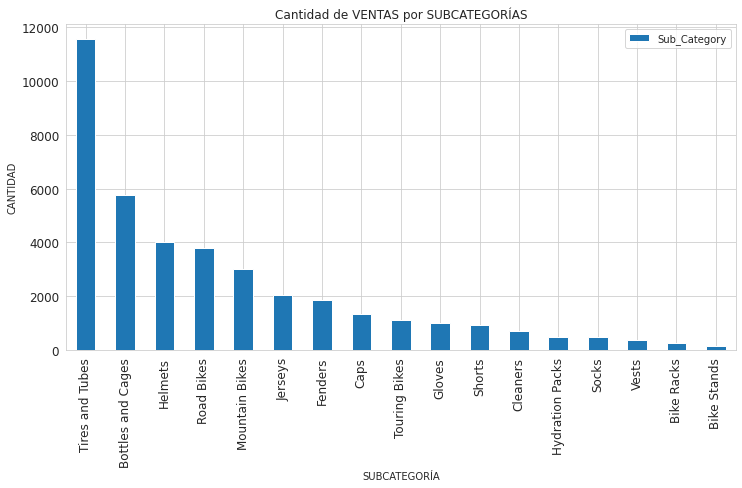

In [86]:
usa_sales["Sub_Category"].value_counts().plot(kind="bar", figsize=(12,6), fontsize=12)
plt.title("Cantidad de VENTAS por SUBCATEGORÍAS")
plt.xlabel("SUBCATEGORÍA")
plt.ylabel("CANTIDAD")
plt.legend()

### CUÁL ES LA GANANCIA TOTAL DE ESTADO DE OREGON? 

In [88]:
usa_sales.groupby(df["State"]=="Oregon").Profit.sum()

State
False    9745410
True     1252228
Name: Profit, dtype: int64

### *TOP 5* PRODUCTOS MÁS VENDIDOS EN OREGON

In [89]:
oregon_sales = usa_sales.loc[usa_sales["State"]=="Oregon", "Product"].value_counts().head(5)
oregon_sales

Patch Kit/8 Patches      547
Water Bottle - 30 oz.    526
Mountain Tire Tube       311
Road Tire Tube           271
Fender Set - Mountain    262
Name: Product, dtype: int64